In [2]:
import pandas as pd
import numpy as np
from GetData import *
from RunBacktest import *

In [3]:
data = make_data()
data

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
2021-01-01,99.628810,99.348567,99.839441,99.094515,99.419814,99.995508,99.241680,99.738164,100.635563,99.568741,...,99.600859,99.116450,98.893203,99.249468,99.217110,100.046984,99.527771,100.728204,100.072788,99.597377
2021-01-02,99.338345,99.222660,98.876339,98.374664,98.690259,99.471950,99.531460,99.590271,101.188645,99.088161,...,99.078016,98.646516,99.267632,98.480358,98.586615,99.377894,100.737246,99.906188,99.891928,100.624019
2021-01-03,100.477700,100.132858,98.300190,100.686393,99.027454,99.973972,99.798721,101.276075,100.150915,100.178457,...,98.637984,99.187310,98.892839,99.067669,99.754552,99.839475,99.874660,99.646391,99.804399,100.312308
2021-01-04,99.748828,100.286855,98.311688,99.302561,98.469672,100.183777,100.210750,99.138076,100.207662,99.161854,...,98.689011,99.508602,98.976151,99.218657,99.307888,98.712645,98.795077,99.458336,99.587389,99.109204
2021-01-05,101.250759,99.911443,98.914185,100.704246,98.493507,100.288956,99.472278,99.422043,99.555445,99.522459,...,99.619021,99.210941,99.328377,100.579210,99.566342,100.050579,99.463449,99.616518,99.704434,100.334603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-06-19,111.475065,110.147611,110.520734,110.288296,111.499177,110.972912,109.839885,110.635442,112.260645,109.934852,...,111.142103,109.994400,110.833340,110.652360,110.230173,110.419646,109.174704,108.792242,111.492770,110.319425
2026-06-20,110.788903,111.149935,110.512932,110.219698,109.523840,110.397894,110.693324,110.062096,110.563211,108.835506,...,110.185957,109.987128,109.960152,109.171385,110.293802,109.799174,109.731282,108.907869,110.746677,109.969240
2026-06-21,110.928771,111.518037,111.150309,111.556821,109.734190,111.011047,111.103346,110.229760,109.667478,109.082542,...,111.431406,111.360246,110.666656,110.192356,110.989267,109.949600,110.846578,109.882754,110.416725,110.064686
2026-06-22,110.427465,110.817375,110.699792,110.704324,109.547070,111.939535,110.393064,109.361752,109.317345,108.399497,...,110.430488,109.560783,110.280244,110.257577,109.290280,110.247029,111.172604,108.924395,110.814063,110.030953


In [4]:
out = run_backtest(data)

                      PairsTradingDistanceApproach
start                          2020-12-31 00:00:00
end                            2026-06-23 00:00:00
rf                                             0.0
total_return                              7.063621
cagr                                      0.464047
max_drawdown                             -0.005615
calmar                                   82.647229
mtd                                       0.032516
three_month                               0.128171
six_month                                 0.257028
ytd                                       0.244339
one_year                                  0.634191
three_year                                0.600591
five_year                                 0.518207
ten_year                                       NaN
incep                                     0.464047
daily_sharpe                             10.119363
daily_sortino                            42.876023
daily_mean                     

/home/degelo/anaconda3/envs/quant/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/home/degelo/anaconda3/envs/quant/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


<AxesSubplot:title={'center':'Equity Progression'}>

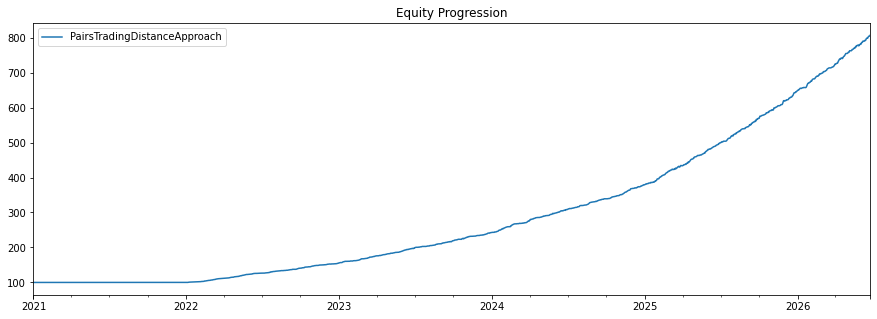

In [5]:
out.plot()

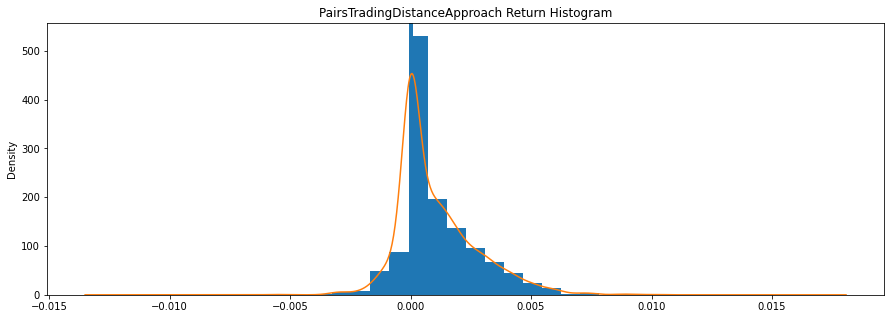

In [6]:
out.plot_histogram()